In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"D:\ASHSIH\ENGG\COURSES\MachineLearning\MeanTemp.csv")
df.head()
df.describe()

,YEAR,ANNUAL,AUTUMN,SUMMER,MONSOON,WINTER
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,24.278718,19.259060,26.087350,27.233333,21.880171
std,33.919021,0.436950,0.672593,0.609349,0.316021,0.549829
min,1901.000000,23.560000,17.580000,24.890000,26.530000,20.960000
25%,1930.000000,24.000000,18.850000,25.690000,27.060000,21.480000
50%,1959.000000,24.150000,19.120000,26.030000,27.180000,21.820000
75%,1988.000000,24.460000,19.610000,26.420000,27.340000,22.170000
max,2017.000000,26.450000,22.250000,28.860000,28.500000,24.210000


In [3]:
cdf = df[['AUTUMN','SUMMER','MONSOON','WINTER','ANNUAL']]
#9 rows to display
cdf.head(9)

,AUTUMN,SUMMER,MONSOON,WINTER,ANNUAL
0,18.71,26.06,27.30,21.92,24.23
1,19.70,26.44,27.18,21.49,24.33
2,19.05,25.47,27.17,21.27,23.80
3,18.66,25.84,26.83,21.42,23.86
4,17.58,24.99,27.37,21.48,23.71
5,18.37,25.93,27.15,22.08,24.12
6,19.35,24.89,26.89,21.76,23.87
7,19.04,26.02,26.95,21.17,23.95
8,18.42,25.71,26.53,21.75,23.78


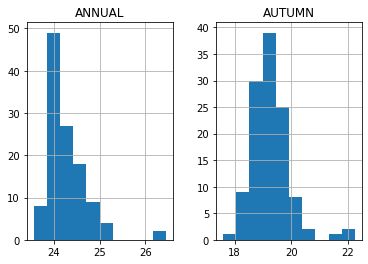

In [41]:
viz = cdf[['AUTUMN','ANNUAL']]
viz.hist()
plt.show()

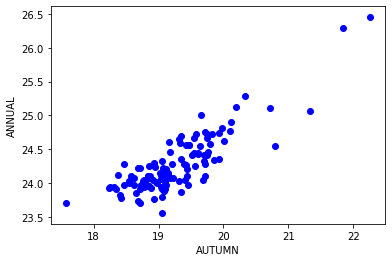

In [5]:
plt.scatter(cdf.AUTUMN, cdf.ANNUAL,  color='blue')
plt.xlabel("AUTUMN")
plt.ylabel("ANNUAL")
plt.show()

In [48]:
msk = np.random.rand(len(df)) < 1.0
train = cdf[msk]


In [32]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AUTUMN']])
train_y = np.asanyarray(train[['ANNUAL']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.55094235]]
Intercept:  [13.6680863]


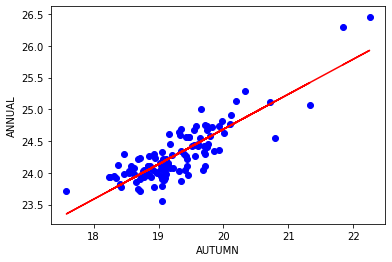

In [33]:
plt.scatter(train.AUTUMN, train.ANNUAL,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("AUTUMN")
plt.ylabel("ANNUAL")
plt.show()


In [34]:
test_x = np.asanyarray(train[['AUTUMN']])
test_y = np.asanyarray(train[['ANNUAL']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.05
R2-score: 0.61


In [37]:
rf=pd.read_csv(r"D:\ASHSIH\ENGG\COURSES\MachineLearning\MeanTemp1.csv")
rf.head()
rf.describe()

,YEAR,ANNUAL,AUTUMN,SUMMER,MONSOON,WINTER
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2013.50000,25.211250,20.575000,27.176250,27.845000,23.003750
std,2.44949,0.731426,1.025782,1.040548,0.409878,0.765468
min,2010.00000,24.670000,19.320000,26.240000,27.460000,22.350000
25%,2011.75000,24.720000,19.975000,26.357500,27.530000,22.492500
50%,2013.50000,24.865000,20.375000,26.700000,27.720000,22.655000
75%,2015.25000,25.420000,21.070000,27.975000,28.020000,23.292500
max,2017.00000,26.450000,22.350000,28.860000,28.500000,24.210000


In [38]:
rdf = rf[['AUTUMN','SUMMER','MONSOON','WINTER','ANNUAL']]
#9 rows to display
rdf.head(9)

,AUTUMN,SUMMER,MONSOON,WINTER,ANNUAL
0,20.12,27.83,27.50,22.60,25.13
1,19.54,26.38,27.54,22.71,24.67
2,20.21,26.55,27.71,22.35,24.69
3,20.54,26.85,27.46,22.50,24.82
4,19.32,26.24,27.88,22.47,24.73
5,20.88,26.29,27.73,22.99,24.91
6,22.35,28.86,28.44,24.20,26.45
7,21.64,28.41,28.50,24.21,26.29


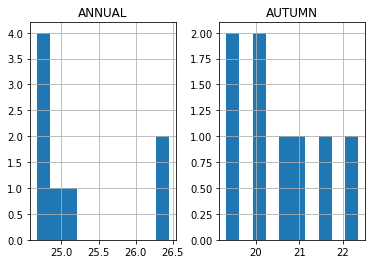

In [43]:
vizz = rdf[['AUTUMN','ANNUAL']]
vizz.hist()
plt.show()

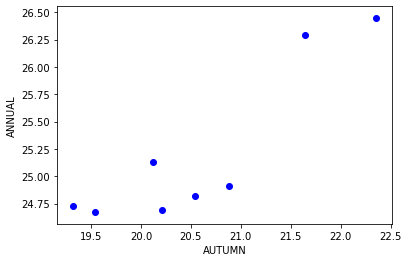

In [45]:
plt.scatter(rdf.AUTUMN, rdf.ANNUAL,  color='blue')
plt.xlabel("AUTUMN")
plt.ylabel("ANNUAL")
plt.show()

In [47]:
rmsk = np.random.rand(len(rf)) < 1.0
test = rdf[rmsk]

In [51]:
test_x = np.asanyarray(test[['AUTUMN']])
test_y = np.asanyarray(test[['ANNUAL']])
test_y_hat = regr.predict(test_x)
print("y val:",test_y_hat)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

y val: [[24.75304635]
 [24.43349979]
 [24.80263116]
 [24.98444213]
 [24.31229247]
 [25.17176253]
 [25.98164778]
 [25.59047872]]
Mean absolute error: 0.34
Residual sum of squares (MSE): 0.15
R2-score: 0.47


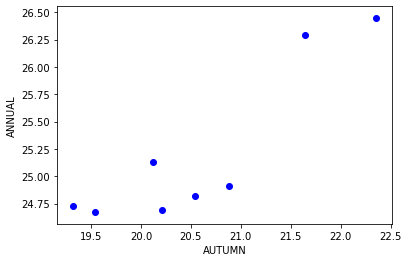

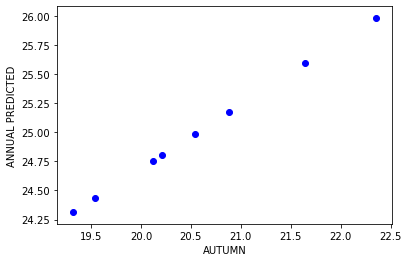

In [54]:
plt.scatter(rdf.AUTUMN, rdf.ANNUAL,  color='blue')
plt.xlabel("AUTUMN")
plt.ylabel("ANNUAL")
plt.show()
plt.scatter(rdf.AUTUMN, test_y_hat,  color='blue')
plt.xlabel("AUTUMN")
plt.ylabel("ANNUAL PREDICTED")
plt.show()
